In [23]:
import pandas as pd


#load anscombe's quartet
x=[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y1=[8.04, 6.58, 5.76, 7.71, 8.84, 8.47, 5.56, 7.91, 6.89, 6.58, 5.76]
y2=[9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3=[7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
y4=[6.58, 5.76, 7.71, 8.84, 8.47, 5.56, 7.91, 6.89, 6.58, 5.76, 7.91]

anscombe = (pd.DataFrame({'x': x, 'y1': y1, 'y2': y2, 'y3': y3, 'y4': y4})
)

anscombe



,x,y1,y2,y3,y4
0,10.0,8.04,9.14,7.46,6.58
1,8.0,6.58,8.14,6.77,5.76
2,13.0,5.76,8.74,12.74,7.71
3,9.0,7.71,8.77,7.11,8.84
4,11.0,8.84,9.26,7.81,8.47
5,14.0,8.47,8.10,8.84,5.56
6,6.0,5.56,6.13,6.08,7.91
7,4.0,7.91,3.10,5.39,6.89
8,12.0,6.89,9.13,8.15,6.58
9,7.0,6.58,7.26,6.42,5.76


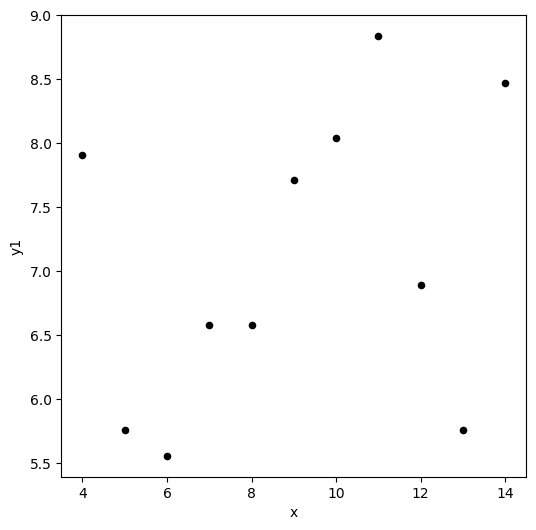

In [24]:
#plot x y1
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
anscombe.plot(kind='scatter', x='x', y='y1', ax=ax, color='k')
plt.show()


In [25]:
x1 = anscombe['x']
y1 = anscombe['y1']
slope = ((x1 - x1.mean()) * (y1 - y1.mean())).sum() / ((x1 - x1.mean())**2).sum()
slope

np.float64(0.11609090909090909)

In [26]:
intercept = y1.mean() - slope * x1.mean()
intercept


np.float64(6.0551818181818176)

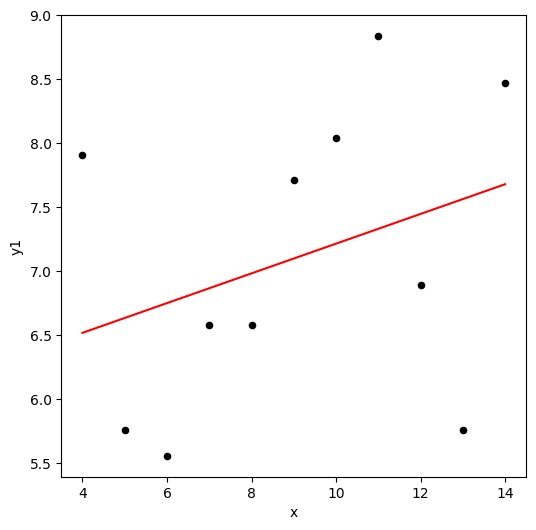

In [27]:
#plot x y1
import numpy as np

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')

#plot the line
x1 = np.linspace(4, 14, 100)
y1 = slope * x1 + intercept
ax.plot(x1, y1, color='r')


In [28]:
from sklearn.linear_model import LinearRegression

x1 =anscombe[['x']]
y1 = anscombe['y1']
y2 = anscombe['y2']
y3 = anscombe['y3']

lr1 = LinearRegression()
lr1.fit(x1, y1)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
lr1.coef_



array([0.11609091])

In [30]:
lr1.intercept_

np.float64(6.0551818181818176)

In [31]:
lr2 = LinearRegression()
lr2.fit(x1, y2)
lr3 = LinearRegression()
lr3.fit(x1, y3)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


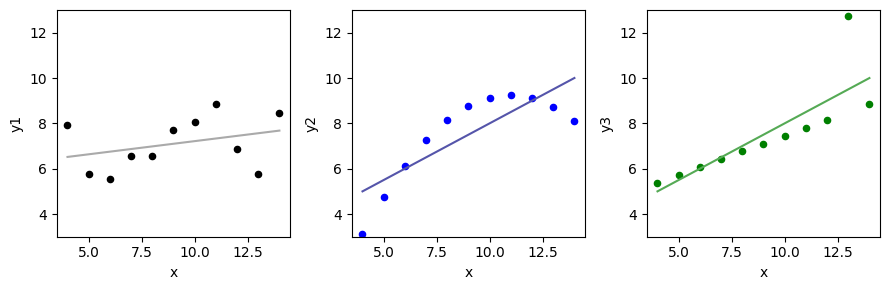

In [32]:
# Plot 1, 2, and 3 in different colors
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Make sure x1 is a 2D array if using sklearn's predict
x1 = np.linspace(4, 14, 100).reshape(-1, 1)

# Plot 1
anscombe.plot.scatter(x='x', y='y1', ax=axs[0], color='k')
axs[0].plot(x1, lr1.predict(x1), color='#aaa')
axs[0].set_ylim(3, 13)

# Plot 2
anscombe.plot.scatter(x='x', y='y2', ax=axs[1], color='b')
axs[1].plot(x1, lr2.predict(x1), color='#55a')
axs[1].set_ylim(3, 13)

# Plot 3
anscombe.plot.scatter(x='x', y='y3', ax=axs[2], color='g')
axs[2].plot(x1, lr3.predict(x1), color='#5a5')
axs[2].set_ylim(3, 13)

plt.tight_layout()
plt.show()


In [33]:
#!pip install datasets


In [34]:
#pip install liac-arff


In [35]:
import arff
import pandas as pd

# Load ARFF file
with open('dataset_2202_elevators.arff') as f:
    data = arff.load(f)

# Convert to pandas DataFrame
df = pd.DataFrame(data['data'], columns=[col[0] for col in data['attributes']])

# Save to CSV (optional)
df.to_csv('dataset_2202_elevators.csv', index=False)

# Show first few rows
print(df.head())



   climbRate   Sgz     p     q  curRoll  absRoll  diffClb  diffRollRate  \
0      118.0 -55.0 -0.28 -0.08     -0.2    -11.0     11.0         0.005   
1      390.0 -45.0 -0.06 -0.07     -0.6    -12.0     11.0         0.010   
2       68.0   6.0  0.11  0.15      0.6    -10.0     -9.0        -0.003   
3     -358.0 -12.0 -0.20  0.13     -0.3    -11.0     -7.0         0.001   
4     -411.0 -19.0 -0.18  0.02     -0.5    -11.0     -3.0         0.002   

   diffDiffClb  SaTime1  SaTime2  SaTime3  SaTime4  diffSaTime1  diffSaTime2  \
0         -0.2  -0.0010  -0.0010  -0.0010  -0.0010       0.0000          0.0   
1         -0.2  -0.0008  -0.0008  -0.0008  -0.0008       0.0000          0.0   
2         -0.2  -0.0011  -0.0010  -0.0010  -0.0010      -0.0002          0.0   
3         -0.1  -0.0010  -0.0010  -0.0010  -0.0010       0.0000          0.0   
4          1.2  -0.0010  -0.0010  -0.0010  -0.0010       0.0000          0.0   

   diffSaTime3  diffSaTime4      Sa   Goal  
0          0.0         

In [36]:
from datasets import load_dataset

# Load local CSV file as a dataset
elevators = load_dataset("csv", data_files="dataset_2202_elevators.csv")

# Convert the 'train' split to a pandas DataFrame
elev = elevators['train'].to_pandas()

# Display the DataFrame
print(elev)


Generating train split: 16599 examples [00:00, 512837.29 examples/s]

       climbRate   Sgz     p     q  curRoll  absRoll  diffClb  diffRollRate  \
0          118.0 -55.0 -0.28 -0.08     -0.2    -11.0     11.0         0.005   
1          390.0 -45.0 -0.06 -0.07     -0.6    -12.0     11.0         0.010   
2           68.0   6.0  0.11  0.15      0.6    -10.0     -9.0        -0.003   
3         -358.0 -12.0 -0.20  0.13     -0.3    -11.0     -7.0         0.001   
4         -411.0 -19.0 -0.18  0.02     -0.5    -11.0     -3.0         0.002   
...          ...   ...   ...   ...      ...      ...      ...           ...   
16594      299.0 -28.0  0.08 -0.12     -0.3     -9.0     15.0         0.010   
16595       84.0   0.0  0.14  0.14      1.1     -8.0    -11.0        -0.014   
16596     -208.0  -6.0 -0.48  0.09      0.2     -9.0     -7.0        -0.010   
16597     -146.0 -14.0 -0.38 -0.03     -0.8    -10.0     10.0         0.010   
16598      282.0 -11.0  0.10 -0.12     -1.2    -10.0     16.0         0.016   

       diffDiffClb  SaTime1  SaTime2  SaTime3  SaTi

In [39]:


X = elev.drop(columns=['Goal'])
y= elev['Goal']

lr_elev = LinearRegression()
lr_elev.fit(X, y)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
lr_elev.coef_

array([ 3.27102410e-06,  5.60974707e-06,  3.74013548e-03,  8.64036126e-04,
        1.05227142e-07,  1.64092446e-03, -6.34044278e-05,  5.36119295e-01,
       -1.13168090e-04, -5.64410313e+00, -5.48664010e+00,  1.87299948e+00,
       -2.35315304e+01,  2.49515181e+00, -7.35963959e+00,  4.87219973e+00,
        1.66386329e+01,  3.24941588e+00])

In [38]:
lr_elev.intercept_


np.float64(0.017687539904602076)

<Axes: >

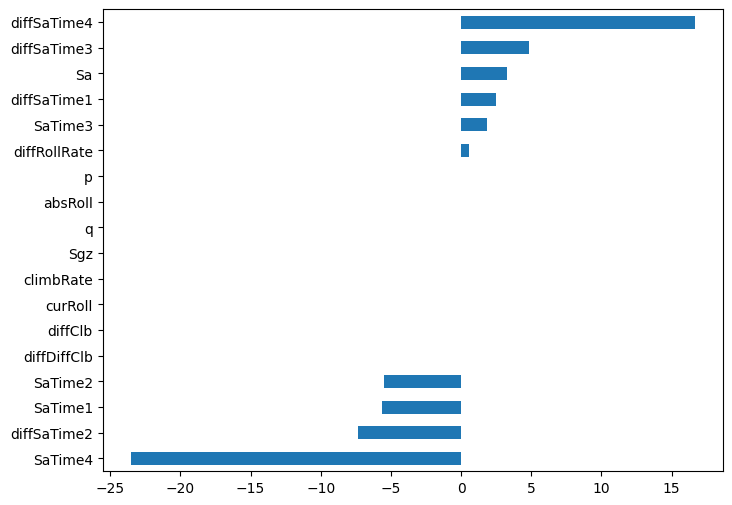

In [41]:
pd.Series(lr_elev.coef_, index=X.columns).sort_values().plot.barh(figsize=(8,6))#!/usr/bin/env python3


In [42]:
lr_elev.score(X, y)


0.8134759022968554

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y, lr_elev.predict(X)), mean_squared_error(y, lr_elev.predict(X))



(0.0019881612491878696, 8.41528861850393e-06)

In [44]:
lr_elev.predict(X.loc[[0]])

array([0.03014407])

In [45]:
y.iloc[0]

np.float64(0.031)

In [46]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.46758883, -1.65891499, -0.86946763, ...,  0.05862429,
        -0.01293731, -0.59307754],
       [ 1.44746791, -1.26581851, -0.16081329, ...,  0.05862429,
        -0.01293731, -0.10579872],
       [ 0.287464  ,  0.73897355,  0.38678324, ...,  0.05862429,
        -0.01293731, -0.59307754],
       ...,
       [-0.70682508,  0.26725777, -1.51369884, ...,  0.05862429,
        -0.01293731, -0.34943813],
       [-0.48347028, -0.04721942, -1.19158323, ...,  0.05862429,
        -0.01293731,  0.62511953],
       [ 1.05839828,  0.07070953,  0.35457168, ...,  0.05862429,
        -0.01293731,  0.86875894]], shape=(16599, 18))

In [49]:
import pandas as pd

# Convert the NumPy array to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)  # Use correct column names

# Now you can use .describe()
X_scaled_df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04
mean,-1.733657e-17,-2.311543e-17,-3.424509e-18,-2.910832e-17,3.424509e-18,-6.849017e-17,5.992890e-18,5.136763e-18,1.926286e-18,-1.386926e-16,-7.191468e-17,2.739607e-17,-3.766960e-17,-5.393601e-17,-1.284191e-18,-2.054705e-17,-3.424509e-18,-1.010230e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-3.534785e+00,-3.388540e+00,-4.380528e+00,-4.354212e+00,-3.201622e+00,-2.976284e+00,-5.244982e+00,-6.590462e+00,-8.706692e+00,-6.831474e+00,-6.739124e+00,-6.738325e+00,-6.442092e+00,-8.002919e+00,-1.041403e-02,-1.027523e+01,-1.293731e-02,-6.440423e+00
25%,-6.780051e-01,-6.368641e-01,-7.084098e-01,-7.292265e-01,-6.797451e-01,-5.387796e-01,-7.030697e-01,-6.317047e-01,-1.748729e-01,-3.715008e-01,-3.579499e-01,-3.578654e-01,-5.933112e-01,1.070695e-01,-1.041403e-02,5.862429e-02,-1.293731e-02,-5.930775e-01
50%,-6.918317e-02,-7.909767e-03,3.245607e-02,-3.875308e-02,5.580243e-02,1.924716e-01,5.391565e-02,3.896161e-03,-6.954175e-02,1.254202e-01,1.329097e-01,1.329392e-01,1.377864e-01,1.070695e-01,-1.041403e-02,5.862429e-02,-1.293731e-02,1.378407e-01
75%,6.801361e-01,6.210446e-01,7.411104e-01,6.517204e-01,6.862717e-01,9.237228e-01,6.216546e-01,6.394970e-01,1.411205e-01,6.223413e-01,6.237693e-01,6.237438e-01,6.251849e-01,1.070695e-01,-1.041403e-02,5.862429e-02,-1.293731e-02,6.251195e-01
max,3.547723e+00,4.198223e+00,3.543516e+00,5.485035e+00,2.997992e+00,1.898724e+00,4.311958e+00,4.532552e+00,8.988933e+00,1.864644e+00,1.850918e+00,1.850755e+00,1.843681e+00,8.217058e+00,1.152312e+02,8.670170e+00,8.588565e+01,1.843317e+00


In [50]:
lr_std  = LinearRegression()
lr_std.fit(X_scaled, y)
lr_std.score(X_scaled, y)


0.8134759022968554

<Axes: >

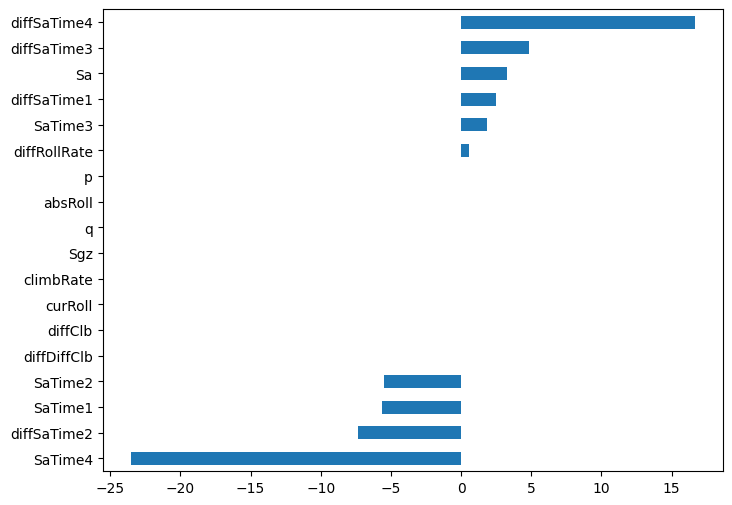

In [51]:
pd.Series(lr_elev.coef_, index=X.columns).sort_values().plot.barh(figsize=(8,6))#!/usr/bin/env python3


In [52]:
# try with XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)
xgb.score(X, y)


0.9542744875539696

In [54]:
import seaborn as sns

# Load Titanic dataset as a pandas DataFrame
titanic = sns.load_dataset('titanic')

# Preview
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [56]:
raw = titanic
raw

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [60]:
def tweak_titanic(df):
    # Drop rows with missing fare or age
    df = df.dropna(subset=['fare', 'age'])

    # Select only numeric features for this regression task
    numeric_cols = df.select_dtypes(include='number').columns.tolist()

    # Return only numeric features
    return df[numeric_cols]




#predict fare from numeric columns
X = tweak_titanic(raw).drop(columns=['fare'])
y = tweak_titanic(raw)['fare']

X



,survived,pclass,age,sibsp,parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0
...,...,...,...,...,...
885,0,3,39.0,0,5
886,0,2,27.0,0,0
887,1,1,19.0,0,0
889,1,1,26.0,0,0


In [61]:
y


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
885    29.1250
886    13.0000
887    30.0000
889    30.0000
890     7.7500
Name: fare, Length: 714, dtype: float64

In [62]:
lr = LinearRegression()
lr.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
lr.score(X, y)

0.36967952889946776

In [64]:
#make an XGBoost model
xgb = XGBRegressor()

xgb.fit(X, y)

xgb.score(X, y)



0.8318405143808066